In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely import geometry
import fiona as fio
import math

In [5]:
census = pd.read_csv("C:\\Users\\Bruno Santos\\Documents\\GitHub\\RDC\\data\\synthetic_data\\census_2021\\census_2021_synthetic.csv")

In [6]:
census

,FRAME_ID,PRCDDA,PR,CMA,PCD,COMPW1,EMPLOYED,CFINC,CFCNT,CF_PNCF_NUMEARNERS,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDIST,PWMODE,PWMODE2,PWMODE3
0,1,10010180,10,1,1,2255,1,160557,5,3,10010841,10,1,1,43.0,3898.0,7,3,1
1,2,10010570,10,1,1,824,1,17083,5,3,10010741,10,1,999,84.0,30735.0,2,3,3
2,3,10010646,10,1,1,2136,1,190375,4,2,10010834,10,1,1,40.0,3639.0,7,3,3
3,4,10010629,10,1,1,762,1,64588,4,3,10010556,10,1,999,47.0,14122.0,6,7,9
4,5,10010165,10,1,1,843,1,20460,3,1,10010553,10,1,999,106.0,31810.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,24210062,24,999,21,579,1,22564,4,3,24220037,24,22,421,118.0,43236.0,1,6,7
199996,199997,24210062,24,999,21,330,1,77976,5,4,24260065,24,26,423,159.0,58180.0,1,7,1
199997,199998,24210062,24,999,21,1616,1,154978,5,3,24340076,24,34,999,158.0,57876.0,1,7,1
199998,199999,24210062,24,999,21,138,1,18622,4,3,24210061,24,21,421,54.0,19768.0,1,6,3


In [7]:
census['PCD'] = census['PRCDDA'].astype(str).str.slice(0, 4)

In [8]:
census['PCD']

0         1001
1         1001
2         1001
3         1001
4         1001
          ... 
199995    2421
199996    2421
199997    2421
199998    2421
199999    2421
Name: PCD, Length: 200000, dtype: object

In [9]:
census_toronto = census[census['PCD'] == '3520']

In [10]:
census_toronto

,FRAME_ID,PRCDDA,PR,CMA,PCD,COMPW1,EMPLOYED,CFINC,CFCNT,CF_PNCF_NUMEARNERS,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDIST,PWMODE,PWMODE2,PWMODE3
67393,67394,35204479,35,535,3520,867,1,135111,3,1,35240952,35,24,535,99.0,29581.0,6,3,3
67396,67397,35203324,35,535,3520,538,1,186544,4,2,35190985,35,19,535,78.0,23490.0,3,1,7
67398,67399,35203047,35,535,3520,1190,1,199769,3,2,35250942,35,25,537,158.0,57776.0,9,3,8
67399,67400,35202655,35,535,3520,1168,1,66773,4,2,35202810,35,20,535,40.0,3635.0,7,4,3
67401,67402,35204146,35,535,3520,770,1,147876,3,1,35181014,35,18,532,134.0,49133.0,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199209,199210,35201582,35,999,3520,1905,2,97175,5,3,-3,-3,-3,-3,-3.0,-3.0,-3,-3,-3
199215,199216,35204873,35,999,3520,352,1,99108,4,3,35191163,35,19,535,157.0,47179.0,3,3,7
199218,199219,35203230,35,999,3520,2196,1,154321,4,3,35204733,35,20,535,74.0,22068.0,3,6,2
199223,199224,35203788,35,999,3520,2015,1,20663,5,4,35202413,35,20,535,59.0,17595.0,3,3,1


In [16]:
sa_mode = pd.read_csv("C:/Bruno/Packages/CommuteCA/data-raw/make-data/Santos_released/released/SA_mode.csv")

In [20]:
sa_mode

,PRCDDA,PwMode,SA_im
0,35200002,Car/motor,56.820414
1,35200002,Transit,4.725475
2,35200003,Car/motor,66.888099
3,35200004,Car/motor,79.930028
4,35200004,Transit,4.503855
...,...,...,...
7481,35205067,Transit,0.013836
7482,35205068,Car/motor,368.313262
7483,35205068,Transit,23.385822
7484,35205069,Car/motor,499.509727


In [18]:
sa_mode_pivot = sa_mode.pivot(index='PRCDDA', columns='PwMode', values='SA_im').reset_index().fillna(0)

In [38]:
census_toronto_sa = census_toronto.merge(sa_mode_pivot, right_on= 'PRCDDA', left_on='PRCDDA', how = 'left').fillna(0)

In [39]:
census_toronto_sa

,FRAME_ID,PRCDDA,PR,CMA,PCD,COMPW1,EMPLOYED,CFINC,CFCNT,CF_PNCF_NUMEARNERS,...,PWCMA,PWDUR,PWDIST,PWMODE,PWMODE2,PWMODE3,Bike,Car/motor,Transit,Walk
0,67394,35204479,35,535,3520,867,1,135111,3,1,...,535,99.0,29581.0,6,3,3,0.000000,0.000000,0.000000,0.000000
1,67397,35203324,35,535,3520,538,1,186544,4,2,...,535,78.0,23490.0,3,1,7,0.000000,98.509268,13.471450,0.000000
2,67399,35203047,35,535,3520,1190,1,199769,3,2,...,537,158.0,57776.0,9,3,8,0.000000,85.784947,8.636540,0.000000
3,67400,35202655,35,535,3520,1168,1,66773,4,2,...,535,40.0,3635.0,7,4,3,0.000000,352.254705,158.670767,5.502161
4,67402,35204146,35,535,3520,770,1,147876,3,1,...,532,134.0,49133.0,1,8,8,0.000000,184.751982,13.987868,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,199210,35201582,35,999,3520,1905,2,97175,5,3,...,-3,-3.0,-3.0,-3,-3,-3,0.000000,65.448955,0.000000,0.000000
3176,199216,35204873,35,999,3520,352,1,99108,4,3,...,535,157.0,47179.0,3,3,7,583.856556,416.405025,0.034766,6.644199
3177,199219,35203230,35,999,3520,2196,1,154321,4,3,...,535,74.0,22068.0,3,6,2,0.000000,161.846146,16.486104,1.288874
3178,199224,35203788,35,999,3520,2015,1,20663,5,4,...,535,59.0,17595.0,3,3,1,0.000000,311.272403,0.000000,0.000000


for youth (15 to 24 years old) - AGE 
older adult - AGE 
women - GENDER_BINARY
low-income individuals - LOLICOA / LOLIMA
unemployed -> 
people with disabilities GovtI_SocAssist 
single-parent households - CFAMSTSIMPLE == 2 
refugees - IMMCAT5 ==  Refugees 300000
New immigrants -  PerImmA - 10 2016 to 2021
racialized populations - DVisMin 

In [40]:

census_toronto_sa['SA'] = (
    census_toronto_sa['Bike'] +
    census_toronto_sa['Car/motor'] +
    census_toronto_sa['Transit'] +
    census_toronto_sa['Walk']
)

In [41]:
maximum = 120
minimum = 1

samples = np.random.beta(a=2, b=4, size=len(census_toronto_sa))
scaled = samples * (maximum - 1) + 1
scaled = scaled.astype(int)

census_toronto_sa['AGE'] = scaled

In [42]:
census_toronto_sa

,FRAME_ID,PRCDDA,PR,CMA,PCD,COMPW1,EMPLOYED,CFINC,CFCNT,CF_PNCF_NUMEARNERS,...,PWDIST,PWMODE,PWMODE2,PWMODE3,Bike,Car/motor,Transit,Walk,SA,AGE
0,67394,35204479,35,535,3520,867,1,135111,3,1,...,29581.0,6,3,3,0.000000,0.000000,0.000000,0.000000,0.000000,68
1,67397,35203324,35,535,3520,538,1,186544,4,2,...,23490.0,3,1,7,0.000000,98.509268,13.471450,0.000000,111.980718,29
2,67399,35203047,35,535,3520,1190,1,199769,3,2,...,57776.0,9,3,8,0.000000,85.784947,8.636540,0.000000,94.421487,73
3,67400,35202655,35,535,3520,1168,1,66773,4,2,...,3635.0,7,4,3,0.000000,352.254705,158.670767,5.502161,516.427633,68
4,67402,35204146,35,535,3520,770,1,147876,3,1,...,49133.0,1,8,8,0.000000,184.751982,13.987868,0.000000,198.739850,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,199210,35201582,35,999,3520,1905,2,97175,5,3,...,-3.0,-3,-3,-3,0.000000,65.448955,0.000000,0.000000,65.448955,54
3176,199216,35204873,35,999,3520,352,1,99108,4,3,...,47179.0,3,3,7,583.856556,416.405025,0.034766,6.644199,1006.940546,54
3177,199219,35203230,35,999,3520,2196,1,154321,4,3,...,22068.0,3,6,2,0.000000,161.846146,16.486104,1.288874,179.621124,31
3178,199224,35203788,35,999,3520,2015,1,20663,5,4,...,17595.0,3,3,1,0.000000,311.272403,0.000000,0.000000,311.272403,19


In [43]:
from scipy.special import expit 

In [78]:
centered = census_toronto_sa['SA'] - census_toronto_sa['SA'].median() 
prob_gender_1 = 1 - expit(-centered * 0.005) 
census_toronto_sa['GENDER_BINARY'] = np.random.binomial(1, prob_gender_1) + 1

<Axes: xlabel='GENDER_BINARY', ylabel='SA'>

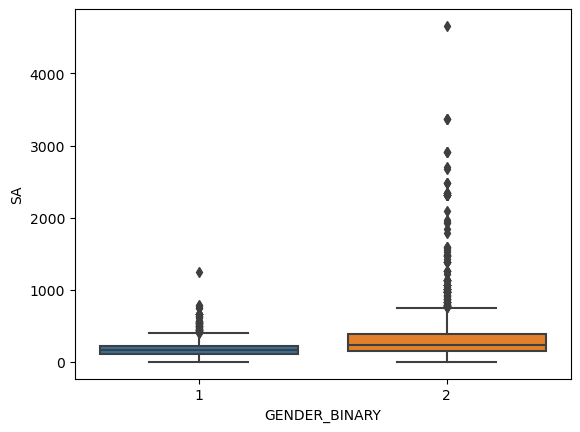

In [79]:
import seaborn as sns
sns.boxplot(data=census_toronto_sa, x='GENDER_BINARY', y='SA')

In [83]:
prob_high = expit(centered * 0.006)   
prob_low = expit(-centered * 0.006)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LOLICOA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LOLICOA.append(-3)
    else:
        LOLICOA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LOLICOA'] = LOLICOA

<Axes: xlabel='LOLICOA', ylabel='SA'>

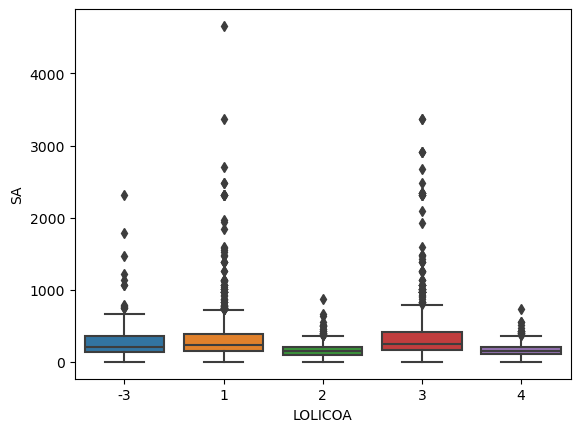

In [85]:
sns.boxplot(data=census_toronto_sa, x='LOLICOA', y='SA')

In [87]:
prob_high = expit(centered * 0.0065)   
prob_low = expit(-centered * 0.0065)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LOLIMA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LOLIMA.append(-3)
    else:
        LOLIMA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LOLIMA'] = LOLIMA

<Axes: xlabel='LOLIMA', ylabel='SA'>

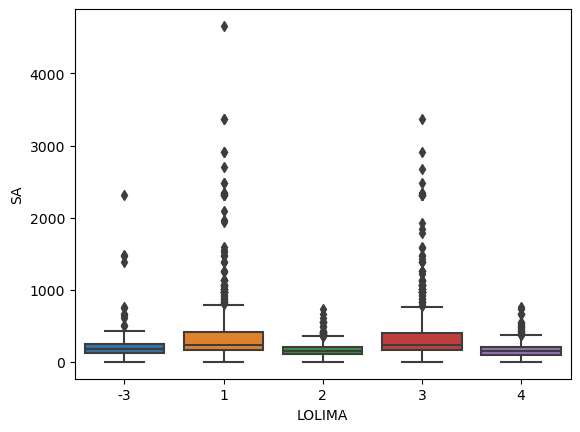

In [90]:
sns.boxplot(data=census_toronto_sa, x='LOLIMA', y='SA')